In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [5]:
df1 = pd.read_csv('partially_cleaned_data.csv')
df1.head()

,job_link,job_title,company_name,city,state,posted_on,job_description,source,excel,python,ML,SQL,R_language,statistics,NLP,BI tools
0,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Web Analyst,NxtWave Disruptive Technologies Private Limited,"Hyderabad, Telangana",Telangana,30+ days ago,Processing confidential and information accor...,Indeed,0,0,0,0,0,0,0,0
1,https://in.indeed.com/company/NORWOOD-INN-&-SU...,Book-keeping and Data Analyst,NORWOOD INN & SUITES,"Remote in Surat, Gujarat",Gujarat,Today,"Must have worked in office, analyzing or acco...",Indeed,0,0,0,0,0,0,0,0
2,https://in.indeed.com/company/Smart-Moves/jobs...,Data Analyst,Smart Moves,"Chennai, Tamil Nadu",Tamil Nadu,Active 21 days ago,"4.Other Financial related activities.,Total wo...",Indeed,0,0,0,0,0,0,0,0
3,https://in.indeed.com/rc/clk?jk=1c19968419f674...,Data Analyst - Intern (Remote/Gurgaon),Tealfeed,"Remote in Gurgaon, Haryana",Haryana,5 days ago,You will be responsible for managing our maste...,Indeed,0,0,0,1,0,0,0,0
4,https://in.indeed.com/company/Fluidonomics-Sol...,Data Research Analyst,Fluidonomics Solutions LLP,"Pune, Maharashtra",Maharashtra,4 days ago,1+ years’ work experience with proven knowledg...,Indeed,0,0,0,0,0,0,0,0


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_link         3113 non-null   object
 1   job_title        3113 non-null   object
 2   company_name     3113 non-null   object
 3   city             3113 non-null   object
 4   state            3113 non-null   object
 5   posted_on        3113 non-null   object
 6   job_description  3113 non-null   object
 7   source           3113 non-null   object
 8   excel            3113 non-null   int64 
 9   python           3113 non-null   int64 
 10  ML               3113 non-null   int64 
 11  SQL              3113 non-null   int64 
 12  R_language       3113 non-null   int64 
 13  statistics       3113 non-null   int64 
 14  NLP              3113 non-null   int64 
 15  BI tools         3113 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 389.2+ KB


In [14]:
round(100*(df1.isnull().sum())/len(df1), 2)

job_link           0.0
job_title          0.0
company_name       0.0
city               0.0
state              0.0
posted_on          0.0
job_description    0.0
source             0.0
excel              0.0
python             0.0
ML                 0.0
SQL                0.0
R_language         0.0
statistics         0.0
NLP                0.0
BI tools           0.0
dtype: float64

In [15]:
df1 = df1.dropna()
df1.shape

(3113, 16)

In [19]:
dict1 = {'company_name': df1['company_name'].unique()}

In [22]:
df1.job_description = df1.job_description.str.replace(',','')

In [23]:
df1.head()

,job_link,job_title,company_name,city,state,posted_on,job_description,source,excel,python,ML,SQL,R_language,statistics,NLP,BI tools
0,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Web Analyst,NxtWave Disruptive Technologies Private Limited,"Hyderabad, Telangana",Telangana,30+ days ago,Processing confidential and information accor...,Indeed,0,0,0,0,0,0,0,0
1,https://in.indeed.com/company/NORWOOD-INN-&-SU...,Book-keeping and Data Analyst,NORWOOD INN & SUITES,"Remote in Surat, Gujarat",Gujarat,Today,Must have worked in office analyzing or accou...,Indeed,0,0,0,0,0,0,0,0
2,https://in.indeed.com/company/Smart-Moves/jobs...,Data Analyst,Smart Moves,"Chennai, Tamil Nadu",Tamil Nadu,Active 21 days ago,4.Other Financial related activities.Total wor...,Indeed,0,0,0,0,0,0,0,0
3,https://in.indeed.com/rc/clk?jk=1c19968419f674...,Data Analyst - Intern (Remote/Gurgaon),Tealfeed,"Remote in Gurgaon, Haryana",Haryana,5 days ago,You will be responsible for managing our maste...,Indeed,0,0,0,1,0,0,0,0
4,https://in.indeed.com/company/Fluidonomics-Sol...,Data Research Analyst,Fluidonomics Solutions LLP,"Pune, Maharashtra",Maharashtra,4 days ago,1+ years’ work experience with proven knowledg...,Indeed,0,0,0,0,0,0,0,0


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [152]:
df1['job_title']= le.fit_transform(df1['job_title'])
df1['state'] = le.fit_transform(df1['state'])
df1['city'] = le.fit_transform(df1['city'])
df1['posted_on'] = le.fit_transform(df1['posted_on'])
df1['source'] = le.fit_transform(df1['source'])

In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 0 to 3112
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_link         3113 non-null   object
 1   job_title        3113 non-null   int64 
 2   company_name     3113 non-null   object
 3   city             3113 non-null   int64 
 4   state            3113 non-null   int64 
 5   posted_on        3113 non-null   object
 6   job_description  3113 non-null   object
 7   source           3113 non-null   object
 8   excel            3113 non-null   int64 
 9   python           3113 non-null   int64 
 10  ML               3113 non-null   int64 
 11  SQL              3113 non-null   int64 
 12  R_language       3113 non-null   int64 
 13  statistics       3113 non-null   int64 
 14  NLP              3113 non-null   int64 
 15  BI tools         3113 non-null   int64 
dtypes: int64(11), object(5)
memory usage: 478.0+ KB


In [153]:
X = df1.iloc[: , 1 :]

In [154]:
X.isnull().sum()

job_title          0
city               0
state              0
posted_on          0
job_description    0
source             0
excel              0
python             0
ML                 0
SQL                0
R_language         0
statistics         0
NLP                0
BI tools           0
dtype: int64

In [155]:
df1.head()

,job_link,job_title,city,state,posted_on,job_description,source,excel,python,ML,SQL,R_language,statistics,NLP,BI tools
0,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,1435,101,83,45,Processing confidential and information accor...,0,0,0,0,0,0,0,0,0
1,https://in.indeed.com/company/NORWOOD-INN-&-SU...,158,261,9,82,Must have worked in office analyzing or accou...,0,0,0,0,0,0,0,0,0
2,https://in.indeed.com/company/Smart-Moves/jobs...,263,50,82,68,4.Other Financial related activities.Total wor...,0,0,0,0,0,0,0,0,0
3,https://in.indeed.com/rc/clk?jk=1c19968419f674...,318,251,13,49,You will be responsible for managing our maste...,0,0,0,0,1,0,0,0,0
4,https://in.indeed.com/company/Fluidonomics-Sol...,511,239,37,47,1+ years’ work experience with proven knowledg...,0,0,0,0,0,0,0,0,0


In [163]:
df1 = df1.drop(['job_description'], axis=1)

In [164]:
df1

,job_link,job_title,city,state,posted_on,source,excel,python,ML,SQL,R_language,statistics,NLP,BI tools
0,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,1435,101,83.0,45,0,0,0,0,0,0,0,0,0
1,https://in.indeed.com/company/NORWOOD-INN-&-SU...,158,261,9.0,82,0,0,0,0,0,0,0,0,0
2,https://in.indeed.com/company/Smart-Moves/jobs...,263,50,82.0,68,0,0,0,0,0,0,0,0,0
3,https://in.indeed.com/rc/clk?jk=1c19968419f674...,318,251,13.0,49,0,0,0,0,1,0,0,0,0
4,https://in.indeed.com/company/Fluidonomics-Sol...,511,239,37.0,47,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3108,https://www.naukri.com/job-listings-jr-applica...,823,8,22.0,4,1,0,0,0,0,0,0,0,0
3109,https://www.naukri.com/job-listings-data-analy...,406,231,65.0,44,1,0,0,0,0,0,0,0,0
3110,https://www.naukri.com/job-listings-big-data-d...,149,8,22.0,44,1,0,0,0,0,0,0,0,0
3111,https://www.naukri.com/job-listings-cgi-is-hir...,212,168,43.0,44,1,0,0,0,0,0,0,0,0


In [165]:
X = df1.iloc[: , 1 :]

In [166]:
X.isnull().sum()

job_title     0
city          0
state         0
posted_on     0
source        0
excel         0
python        0
ML            0
SQL           0
R_language    0
statistics    0
NLP           0
BI tools      0
dtype: int64

In [167]:
df1["state"] = [float(str(i).replace(",", "")) for i in df1["state"]]

In [168]:
df1

,job_link,job_title,city,state,posted_on,source,excel,python,ML,SQL,R_language,statistics,NLP,BI tools
0,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,1435,101,83.0,45,0,0,0,0,0,0,0,0,0
1,https://in.indeed.com/company/NORWOOD-INN-&-SU...,158,261,9.0,82,0,0,0,0,0,0,0,0,0
2,https://in.indeed.com/company/Smart-Moves/jobs...,263,50,82.0,68,0,0,0,0,0,0,0,0,0
3,https://in.indeed.com/rc/clk?jk=1c19968419f674...,318,251,13.0,49,0,0,0,0,1,0,0,0,0
4,https://in.indeed.com/company/Fluidonomics-Sol...,511,239,37.0,47,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3108,https://www.naukri.com/job-listings-jr-applica...,823,8,22.0,4,1,0,0,0,0,0,0,0,0
3109,https://www.naukri.com/job-listings-data-analy...,406,231,65.0,44,1,0,0,0,0,0,0,0,0
3110,https://www.naukri.com/job-listings-big-data-d...,149,8,22.0,44,1,0,0,0,0,0,0,0,0
3111,https://www.naukri.com/job-listings-cgi-is-hir...,212,168,43.0,44,1,0,0,0,0,0,0,0,0


In [169]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import KMeans

#print(labels.labels_)
kmeans = KMeans(n_clusters=8, random_state=0, init='k-means++').fit(X)
labels = kmeans.fit(X)
kmeans.fit(X)



KMeans(random_state=0)

In [170]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(X)

KMeans(max_iter=50, n_clusters=4)

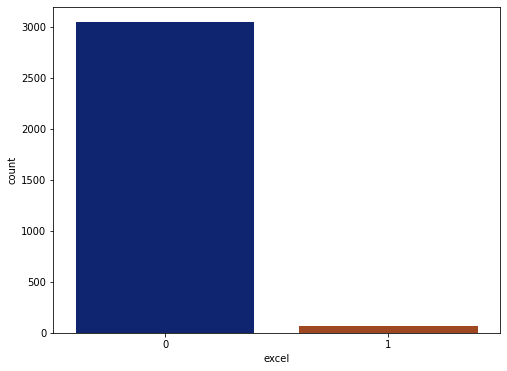

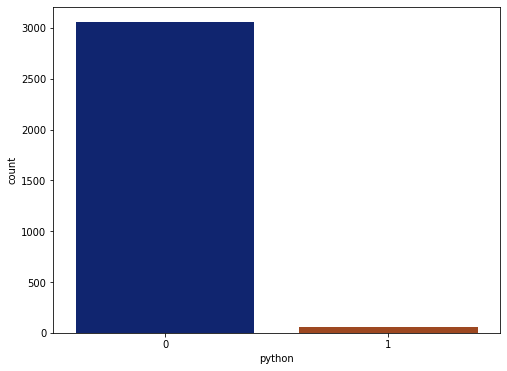

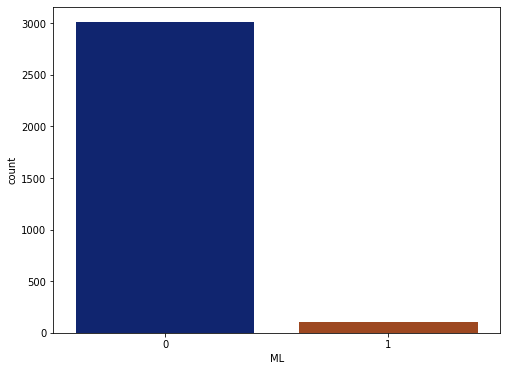

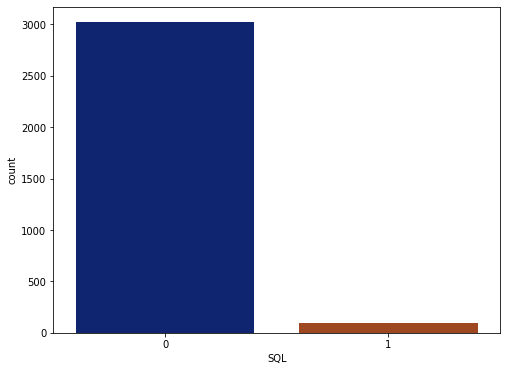

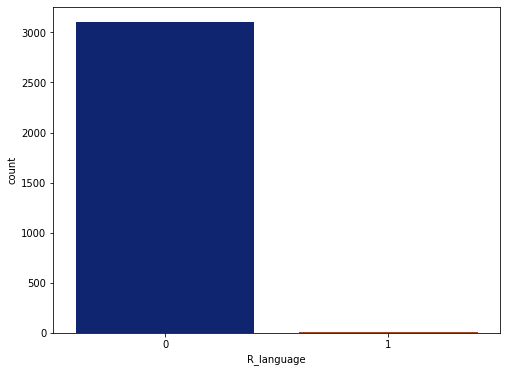

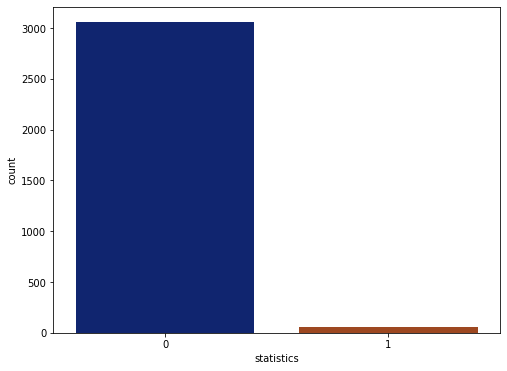

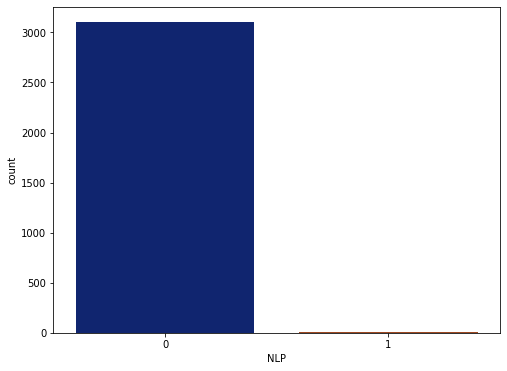

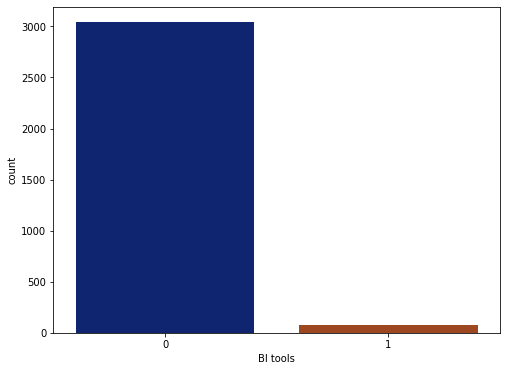

In [111]:
skills = ['excel', 'python','ML', 'SQL', 'R_language', 'statistics', 'NLP', 'BI tools']
for col in skills:
    plt.figure(figsize = (8,6))
    sns.countplot(x = col, data = df, palette = 'dark')
    plt.show()

In [171]:
df['Clusters'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


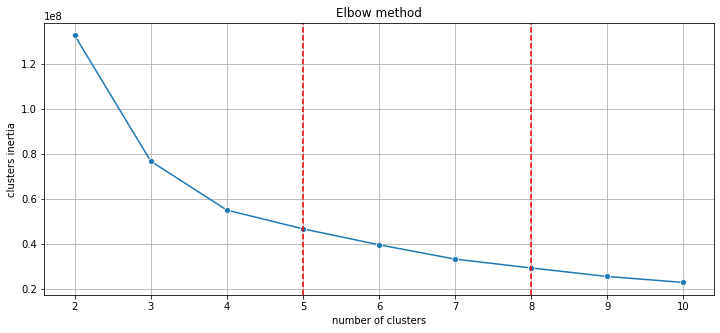

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X, KM_est.labels_)
    s_scores.append(silhouette_avg)
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(8, ls="--", c="red")
plt.grid()
plt.show()

In [173]:
X['Cluster'] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


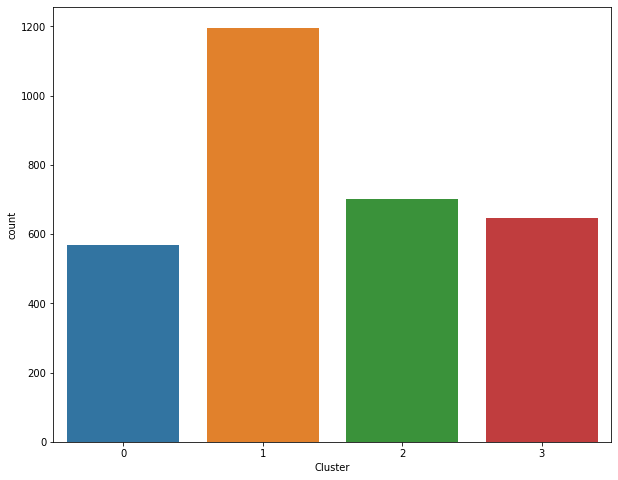

In [174]:
plt.figure(figsize=(10,8))
sns.countplot(X['Cluster'])
plt.show()

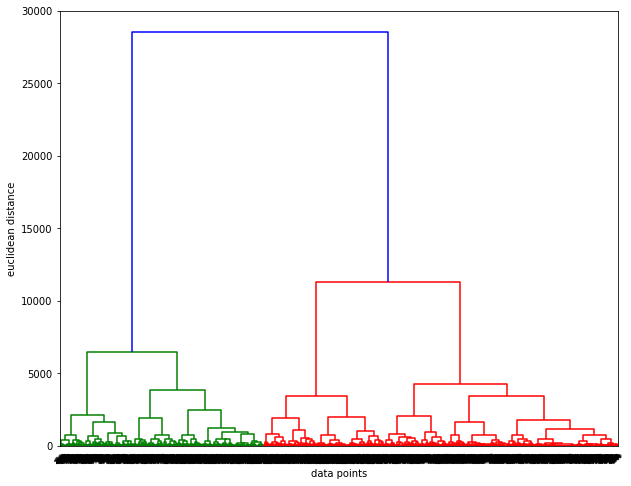

In [175]:
## Herarical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(X.iloc[:,0:-1],method="ward")
plt.figure(figsize=(10,8))
dendrogram(merg,leaf_rotation = 40)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

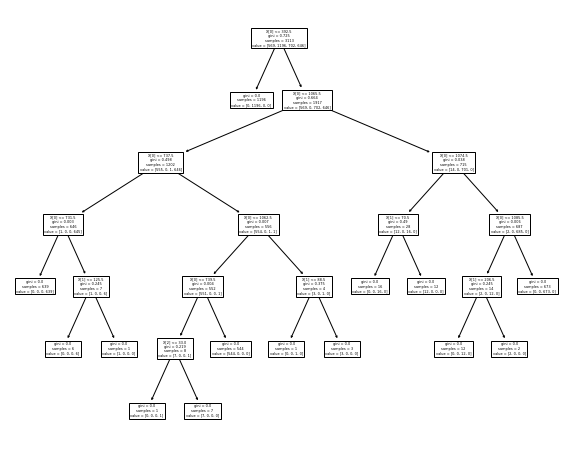

In [176]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X.iloc[:,0:-1].values,X['Cluster'].values) 

from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(clf)
plt.show()